In [1]:
print("ready")

ready


Library

before start we need some library to help during image processing, build neural network and calculate accuracy

In [5]:
#import library

#neural network
import tensorflow as tf
import os
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skimage.io import imread,imshow
from skimage.transform import resize 

#opencv
import cv2

#statics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#widgets
from ipywidgets import FileUpload
from IPython.display import display

In [6]:
from keras import backend as K

Dataset

In [7]:
train_path = "../../../../../RESEARCH/dataset/bisindo/Citra BISINDO/latih" 
test_path = "../../../../../RESEARCH/dataset/bisindo/Citra BISINDO/test" 

In [8]:
img_width = 128 #128 mendapatkan akurasi terbaik
img_height = 128

train dataset

In [9]:
train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    # horizontal_flip=True,
    # vertical_flip=True,
    # rotation_range=0.2
)

In [10]:
train_data = train_data.flow_from_directory(
    directory=train_path,
    target_size=(img_height,img_width),
    class_mode='categorical',
    batch_size=10
)

Found 2659 images belonging to 26 classes.


test dataset

In [11]:
test_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    # horizontal_flip=True,
    # vertical_flip=True,
    # rotation_range=0.2
)

In [12]:
test_data = test_data.flow_from_directory(
    directory=test_path,
    target_size=(img_height,img_width),
    class_mode='categorical',
    batch_size=10
)

Found 1819 images belonging to 26 classes.


show dataset

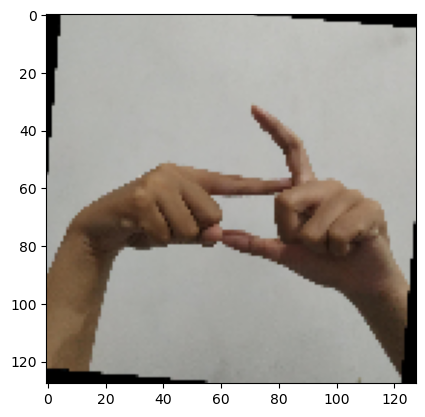

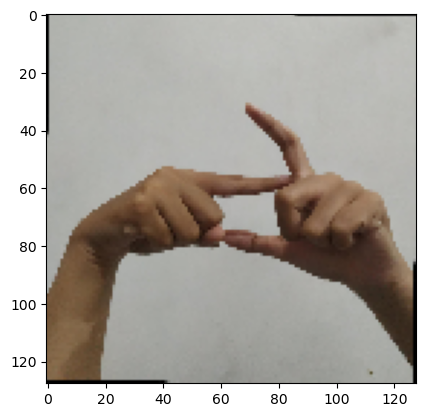

In [17]:
for i in range(2):
    img,label = train_data.next()
    plt.imshow(img[i])
    plt.show()

arsitektur cnn

In [13]:
layers = tf.keras.layers

#sequential model
model = tf.keras.models.Sequential()

#150x150x8
model.add(layers.Conv2D(16,(3,3),
        padding="same",
        activation="relu",
        input_shape=(img_height,img_width,3)   
    )
)

model.add(layers.MaxPool2D(
        pool_size=(2,2),
        padding='same'
    )
)

model.add(
    layers.Dropout(0.2)
)

#145x145x32
model.add(layers.Conv2D(32,(3,3),
        padding="same",
        activation="relu",
        input_shape=(img_height,img_width,3)   
    )
)

model.add(layers.MaxPool2D(
        pool_size=(2,2),
        padding='same'
    )
)

model.add(
    layers.Dropout(0.2)
)

model.add(layers.Conv2D(64,(3,3),
        padding="same",
        activation="relu",
        input_shape=(img_height,img_width,3)   
    )
)

model.add(layers.MaxPool2D(
        pool_size=(2,2),
        padding='same'
    )
)

model.add(
    layers.Dropout(0.2)
)

#flatten
model.add(
    layers.Flatten()
)

#dense 1
model.add(layers.Dense(
        128,
        activation='relu'
    )
)

#dropout
model.add(
    layers.Dropout(0.2)
)

#dense 2
model.add(layers.Dense(
        26,
        activation='softmax'
    )
)


optimizer

In [14]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + 
    K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [15]:
#optimizer
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        f1_m,
        precision_m,
        recall_m
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       1544      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dropout (Dropout)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 300)               39321900  
                                                        

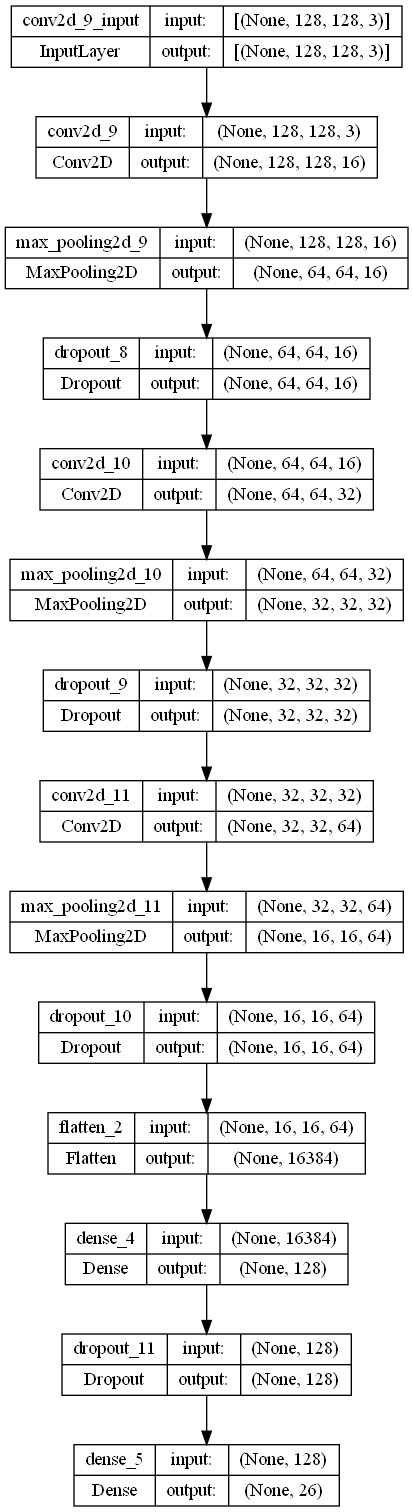

In [29]:
#gambar model
tf.keras.utils.plot_model(model,show_shapes=True)

fit model

In [16]:
train = model.fit(
    train_data,
    epochs=10,
    steps_per_epoch=150,
    shuffle=True,
    validation_data=test_data,
    validation_steps=10,
    verbose=1
)

Epoch 1/10
150/150 [==============================] - 185s 1s/step - loss: 3.0572 - accuracy: 0.1201 - f1_m: 0.0310 - precision_m: 0.1228 - recall_m: 0.0187 - val_loss: 2.0052 - val_accuracy: 0.4100 - val_f1_m: 0.2397 - val_precision_m: 0.7000 - val_recall_m: 0.1500
Epoch 2/10
150/150 [==============================] - 133s 889ms/step - loss: 1.2896 - accuracy: 0.6413 - f1_m: 0.6174 - precision_m: 0.8906 - recall_m: 0.5027 - val_loss: 0.9321 - val_accuracy: 0.8000 - val_f1_m: 0.7819 - val_precision_m: 0.9014 - val_recall_m: 0.7000
Epoch 3/10
150/150 [==============================] - 127s 843ms/step - loss: 0.6942 - accuracy: 0.8032 - f1_m: 0.8132 - precision_m: 0.9165 - recall_m: 0.7412 - val_loss: 0.5289 - val_accuracy: 0.8700 - val_f1_m: 0.8561 - val_precision_m: 0.9732 - val_recall_m: 0.7700
Epoch 4/10
150/150 [==============================] - 122s 812ms/step - loss: 0.4091 - accuracy: 0.8859 - f1_m: 0.8919 - precision_m: 0.9484 - recall_m: 0.8472 - val_loss: 0.3757 - val_accuracy

evaluasi model

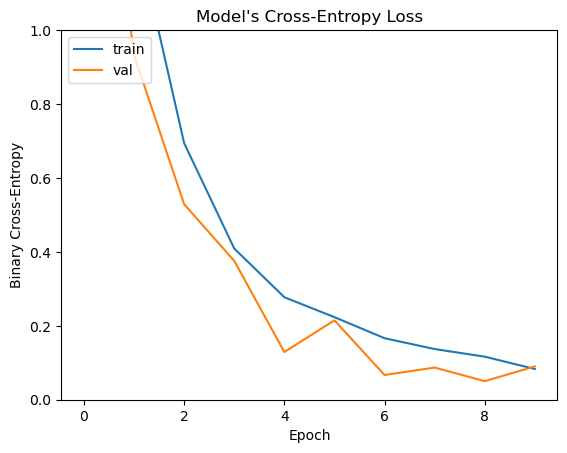

In [17]:
#visualisasi
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title("Model's Cross-Entropy Loss")
plt.ylabel('Binary Cross-Entropy')
plt.xlabel('Epoch')
plt.axis([None, None, 0, 1])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

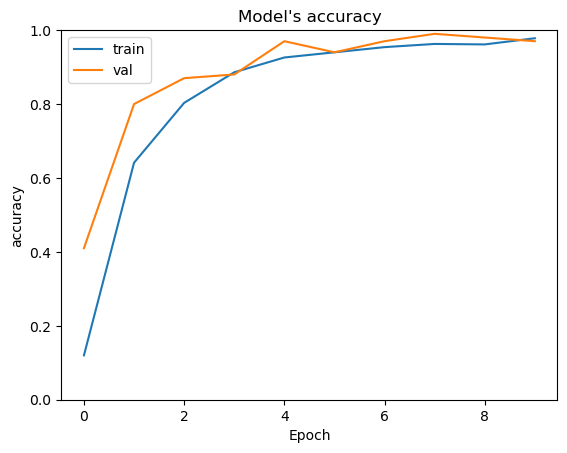

In [18]:
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title("Model's accuracy")
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.axis([None, None, 0, 1])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

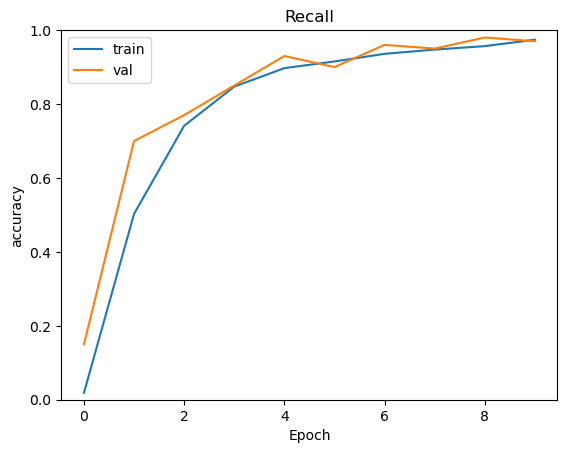

In [21]:
plt.plot(train.history['recall_m'])
plt.plot(train.history['val_recall_m'])
plt.title("Recall")
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.axis([None, None, 0, 1])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

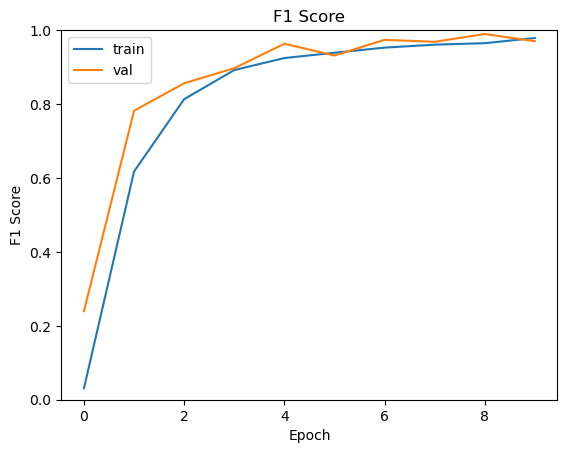

In [24]:
plt.plot(train.history['f1_m'])
plt.plot(train.history['val_f1_m'])
plt.title("F1 Score")
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.axis([None, None, 0, 1])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

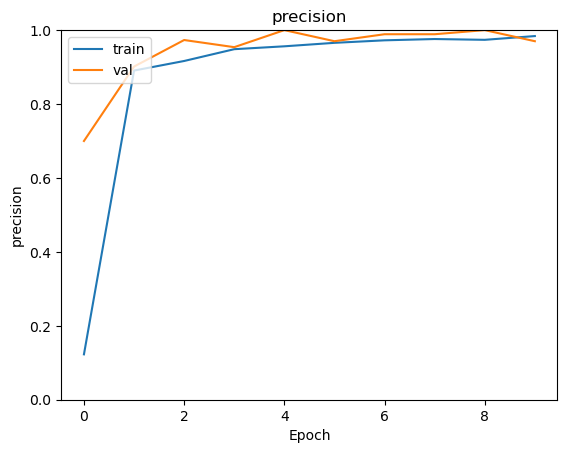

In [25]:
plt.plot(train.history['precision_m'])
plt.plot(train.history['val_precision_m'])
plt.title("precision")
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.axis([None, None, 0, 1])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

evaluasi model

In [24]:
model.evaluate(test_data)

770/770 [==============================] - 895s 1s/step - loss: 0.0346 - accuracy: 0.9936


[0.03460637480020523, 0.9936347007751465]

testing dengan gambar uji

In [25]:
img = tf.keras.preprocessing.image

1/1 [==============================] - 1s 513ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


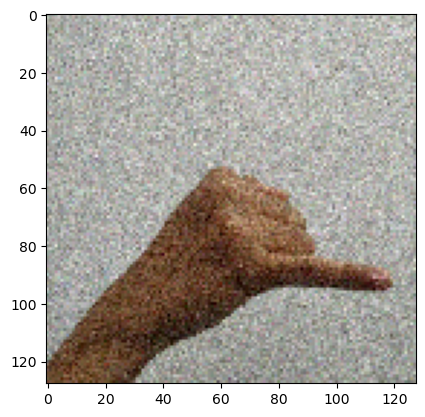

In [28]:
imagepath = "../../../../../RESEARCH/dataset/bisindo/Citra BISINDO/test/J/j (70).jpg" 
image = img.load_img(imagepath,target_size=(128,128))
plt.imshow(image)
#preprocessing gambar
x = img.img_to_array(image)
x = np.expand_dims(x,axis=0)
data = np.vstack([x])
result_predict = model.predict(data,batch_size=2)
print(result_predict)

save model

In [27]:
model.save('result-model/bisindo-cnn5.h5')

load and test model

In [29]:
img = tf.keras.preprocessing.image

In [37]:
#load model
model = tf.keras.models.load_model('result-model/bisindo-cnn4.h5')

1/1 [==============================] - 0s 181ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


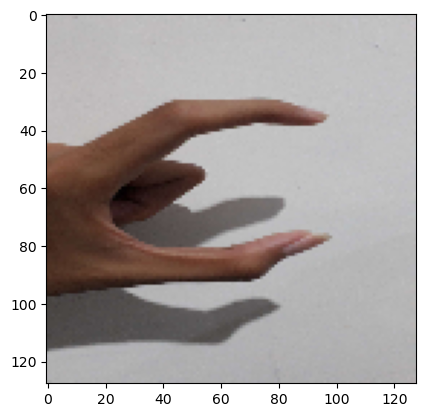

In [38]:
imagepath = "../CNN/testimage/test (1).jpg" 
image = img.load_img(imagepath,target_size=(128,128))
plt.imshow(image)
#preprocessing gambar
x = img.img_to_array(image)
x = np.expand_dims(x,axis=0)
data = np.vstack([x])
result_predict = model.predict(data,batch_size=2)
print(result_predict)

In [5]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\alsto\AppData\Local\Temp\tmpivomse_s\assets


INFO:tensorflow:Assets written to: C:\Users\alsto\AppData\Local\Temp\tmpivomse_s\assets


In [6]:
open("result-model/bisindo-tflite5.tflite","wb").write(tflite_quant_model)

8501040

In [ ]:
interpreter = tf.lite.Interpreter(model_path="bisindo-tflite1.tflite")
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(output_details[0]['dtype'])
print(input_details[0]['dtype'])

<class 'numpy.float32'>
<class 'numpy.float32'>


convert to tflite